In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

import pandas as pd
import seaborn as sns

# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MCD3020 - Introducción a Ciencia de Datos

## Tutorial 12: Entrenamiento de Algoritmos de Aprendizaje Supervisado.


## Introducción.

Este tutorial tiene como objetivo demostrar la estructura general e implementación computacional de algortimos de aprendizaje supervisado en `sklearn`. El entrenamiento de modelos de regresión y clasificación sigue un lógica y orden común, que serán explicados paso a paso en base a un ejemplo genérico, que puede ser aplicado con mínimas modificaciones a distintos problemas.


## Creación de datos sintéticos.

Para este ejemplo, trabajaremos con datos sintéticos generados por la siguiente función:

In [107]:
def make_data(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-5, 3, size=n_samples)
    y_no_noise = (x*np.sin(0.5 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) *10
    df=pd.DataFrame()
    df['x']=x
    df['y']=y
    return df

In [108]:
#Crear datos de ejemplo
data = make_data(n_samples=1000)
data

,x,y
0,-2.003679,-1.379517
1,2.605714,37.831089
2,0.855952,15.913949
3,-0.210732,4.220166
4,-3.751851,3.864856
...,...,...
995,-4.267343,-19.783701
996,2.338509,38.792418
997,-3.905451,-3.184349
998,2.601899,46.803372


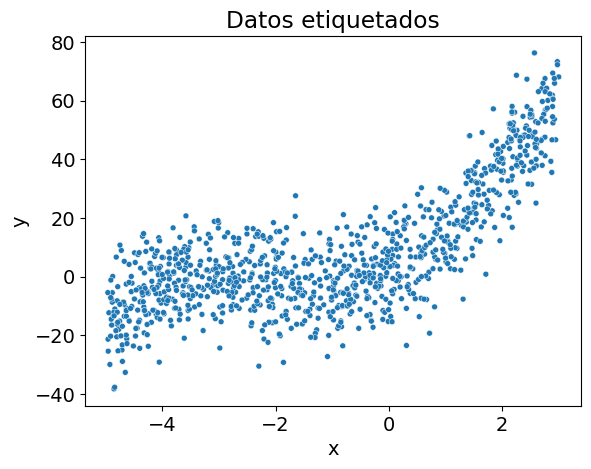

In [109]:
sns.scatterplot(data=data,marker='o',x='x',y='y',size=3,legend=False)
plt.title('Datos etiquetados');

## Paso 1: Crear datasets de entrenamiento y prueba.

`sklearn` es la principal librería de `Python` para machine learning. La documentación completa se encuentra en: https://scikit-learn.org/stable/user_guide.html <br>


`sklearn` implementa funciones útiles  para la preparación, selección y evaluación de modelos, como  `train_test_split()` y `metrics`. Para más información de estos módulos, ver: 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html



In [146]:
from sklearn.model_selection import train_test_split

X=data['x'].values
y=data['y'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=66)

In [147]:
X_train

array([-4.31722028, -3.69652458, -1.01305782, -0.73231126,  0.52315863,
       -3.75204384,  0.09128329, -0.51249623,  0.77961692, -2.41437654,
        0.69743377, -1.10055041, -2.77127729, -1.25071486, -0.21680017,
       -0.27815467,  2.97499401, -3.80066058, -2.69045011,  0.88056835,
        0.27139154,  1.31336991,  2.18443432, -0.22525721, -2.4454909 ,
        0.12699796, -1.52918681, -0.97823688,  2.59839931, -4.40359485,
       -2.41056611,  2.30592442, -2.11847487,  0.90426893,  1.94774381,
       -1.98829306, -1.04463756, -4.80547227,  1.94879303,  2.17430728,
        2.23326956, -4.43049081, -3.87909459, -2.11220882, -4.51137632,
       -0.14627963, -4.91329879,  2.91968186, -2.04869088, -0.14856752,
       -3.89983245, -0.58362255,  1.33263235, -2.8228389 , -4.95950733,
        1.41757585,  1.39884205,  1.35220151,  0.37708438, -2.71923865,
        0.10045977,  2.15641782,  1.93657855, -2.00367905,  1.90482741,
        2.69738039,  1.00696854,  2.78408444,  2.37499388,  2.43

In [148]:
X_test

array([-0.76279537,  0.3202934 , -4.3046377 , -1.81465045,  2.14047199,
        1.62990007,  1.97168472,  1.17854713,  2.99774139, -2.17318218,
       -1.54672363, -2.92461253,  2.50672365, -4.79690915,  1.50320807,
       -3.2242227 , -3.14229844,  1.77161833, -1.56804778, -4.27035118,
        0.57389732,  1.17016277, -3.59702977, -2.98560753, -2.98050445,
        0.13625317,  2.25083508, -4.70490442, -3.82341215,  0.71676738,
       -2.93677738, -1.98444456, -4.20446886,  1.63793443, -2.78497881,
        2.16418583, -4.79664699,  0.30017827, -0.26068345, -2.72979275,
       -0.84865836, -4.71246181, -0.05396183,  1.92405701, -0.25126037,
        0.19971145,  0.15199635, -2.75252392,  0.5275019 , -3.78477845,
       -1.70527269,  2.58762646,  1.01899624, -3.04808285,  2.17688208,
        1.53954849, -2.85058112, -3.06072214, -3.54851652, -1.31376986,
       -0.33286564,  2.60049574, -3.84084102,  2.9730947 , -4.49300024,
       -4.86729737,  2.31876721, -0.03941795, -1.22346444,  0.70

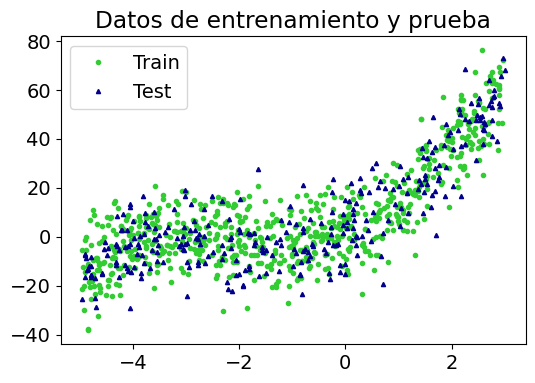

In [149]:
fig,ax=plt.subplots(1,1,figsize=(6,4))
ax.plot(X_train,y_train,'o',markersize=3,color='limegreen',label='Train')
ax.plot(X_test,y_test,'^',markersize=3,color='darkblue',label='Test')
plt.legend()
plt.title('Datos de entrenamiento y prueba');

## Paso 2: Estandarizar los datos.

* Se aplica cuando hay más de una variable predictora, para evitar efectos de escala entre variables que pueden tener rangos de valores muy distintos. Para el ejemplo como sólo una variable independiente no es necesario, pero lo implementaremos de todas formas como demostración.
* No siempre es necesario, pero no perjudica.
* Sí es necesario para todos los algoritmos basados en distancia, como kNN.


In [151]:
X_train.shape

(700,)

In [154]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [155]:
X_train.shape

(700, 1)

In [156]:
from sklearn.preprocessing import StandardScaler

#Standard scaler
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train) #esto genera un np.array
X_test_sc= sc.transform(X_test)


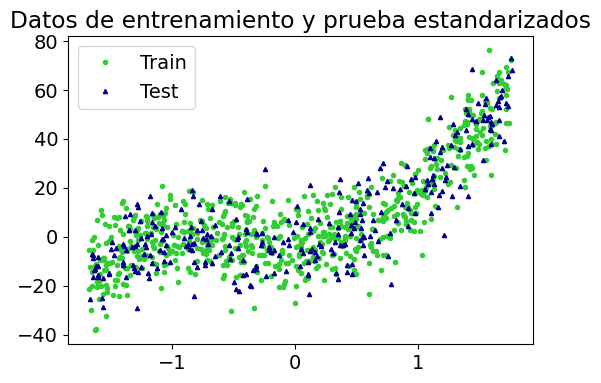

In [157]:
fig,ax=plt.subplots(1,1,figsize=(6,4))
ax.plot(X_train_sc[:,0],y_train,'o',markersize=3,color='limegreen',label='Train')
ax.plot(X_test_sc[:,0],y_test,'^',markersize=3,color='darkblue',label='Test')
plt.legend()
plt.title('Datos de entrenamiento y prueba estandarizados');

## Paso 3: Definir un modelo.

En `sklearn`, un estimador es un objeto Python que implementa los métodos  `.fit(X, y)` y `.predict(X)`.


In [166]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


# Fijar número de vecinos
k = 10
model = KNeighborsRegressor(n_neighbors=k)

## Paso 4: Entrenar el modelo, usando los datos de entrenamiento `(X_train,y_train)`.


In [167]:
# Entrenar el regresor - asegurarse de que los arreglos de entrada tienen la forma correcta
model.fit(X_train_sc, y_train)

#Predicción para datos de entrenamiento
y_predict_train=model.predict(X_train_sc)


# Evaluar R^2 para el set de entrenamiento 
r2_train = model.score(X_train_sc, y_train)

# Evaluar RMSE para el set de entrenamiento 
mse_train= mean_squared_error(y_train,y_predict_train)


## Paso 5: Evaluar el modelo sobre los datos de prueba `(X_test,y_test)`

In [168]:
#Predicción para datos de prueba
y_predict_test=model.predict(X_test_sc)

In [169]:
# Evaluar R^2 para el set de prueba 
r2_test = model.score(X_test_sc, y_test)
mse_test= mean_squared_error(y_test,y_predict_test)


print(f'R^2 (train)=%.2f'%(r2_train))
print(f'R^2 (test)=%.2f'%(r2_test))

print(f'RMSE (train)=%.2f'%(mse_train))
print(f'RMSE (test)=%.2f'%(mse_test))

R^2 (train)=0.78
R^2 (test)=0.76
RMSE (train)=90.54
RMSE (test)=109.78


El rendimiento del modelo para los datos de prueba, es un poco menor pero comparable al rendimiento para los datos de entrenamiento.

## Paso 6: Visualizar el modelo

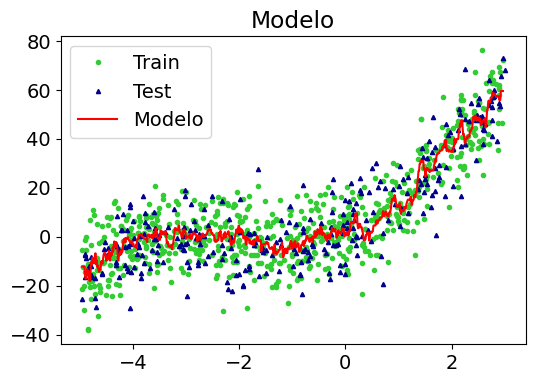

In [170]:
fig,ax=plt.subplots(1,1,figsize=(6,4))

ax.plot(X_train[:,0],y_train,'o',markersize=3,color='limegreen',label='Train')
ax.plot(X_test[:,0],y_test,'^',markersize=3,color='darkblue',label='Test')


#creamos un vector de valores posibles de x
x_model=np.arange(X_train.min(),X_train.max(),0.01).reshape(-1, 1)

#estandarizamos x_model, igual como hicimos para los datos de entrenamiento.
x_model_sc= sc.transform(x_model)


#predicciones de y para x_model
y_model=model.predict(x_model_sc)

#graficar el modelo
ax.plot(x_model,y_model,'-',color='r',label='Modelo')

plt.legend()
plt.title('Modelo');

## Resumen: todo el proceso

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X=data['x'].values.reshape(-1,1)
y=data['y'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=66)

#Estandarizar datos
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train) #esto genera un np.array
X_test_sc= sc.transform(X_test)


# Elegir modelo y fijar hiperparámetros
k = 5
model = KNeighborsRegressor(n_neighbors=k)


# Entrenar el modelo
model.fit(X_train_sc, y_train)

#Predicción para datos de entrenamiento
y_predict_train=model.predict(X_train_sc)


# Evaluar R^2 para el set de entrenamiento 
r2_train = model.score(X_train_sc, y_train)
# Evaluar RMSE para el set de entrenamiento 
mse_train= mean_squared_error(y_train,y_predict_train)


#Predicción para datos de prueba
y_predict_test=model.predict(X_test_sc)

# Evaluar R^2 para el set de prueba 
r2_test = model.score(X_test_sc, y_test)
mse_test= mean_squared_error(y_test,y_predict_test)


print(f'R^2 (train)=%.2f'%(r2_train))
print(f'R^2 (test)=%.2f'%(r2_test))

print(f'RMSE (train)=%.2f'%(mse_train))
print(f'RMSE (test)=%.2f'%(mse_test))

R^2 (train)=0.81
R^2 (test)=0.74
RMSE (train)=80.01
RMSE (test)=123.28
